
# NICS Background Check Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Project Background

This is a basic data analysis project submitted as a course requirement for the Udacity Data Analyst Nanodegree program.

### Dataset Description 

I analyzed the **NICS Firearm Background Check** and **US Census data** to answer questions about background checks and to identify possible correlations between demographics and firearm background checks. Background checks are required during the purchase of a firearm. Background check data can be used as an indicator of gun sales and the prevelance of guns in the US. The US Census dataset contains demographic information about the population of the US and can be used to understand changes in the makeup and economic health of the US on a state-by-state basis. By comparing data from the NICS background check dataset and the US Census dataset, it might be possible to identify relationships between demographic indicators and background checks and from this, infer trends in gun sales.

The **NICS Firearm Background Check dataset** includes 27 columns of data. Relevant columns for this analysis are:

* month - reporting month
* state - reporting state
* permit - background check for permit
* handgun - background check for potential handgun sale
* long_gun - background check for potential long gun sale
* other - background check for potential other sale
* multiple - background check for potential sale of more than one firearm	
* private_sale_handgun - background check for potential private sale
* private_sale_long_gun - background check for potential private sale
* private_sale_other - background check for potential private sale


The **US Census dataset** includes 52 columns of data. Relevant columns for this analysis are:

* Population estimates, July 1, 2016,  (V2016)
* Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
* Median value of owner-occupied housing units, 2011-2015
* Median gross rent, 2011-2015
* Building permits, 2016
* High school graduate or higher, percent of persons age 25 years+, 2011-2015
* Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
* Persons  without health insurance, under age 65 years, percent
* In civilian labor force, total, percent of population age 16 years+, 2011-2015
* Median household income (in 2015 dollars), 2011-2015
* Per capita income in past 12 months (in 2015 dollars), 2011-2015
* Population per square mile, 2010
* Land area in square miles, 2010

### Research Questions

Key questions:

1) **Which states have had the largest number of background checks during 2010-2016?**
2) **Which states have had the largest increse in background checks since 2010?**
3) **Are there any potential relationships between a changes in the number of background checks and other changes in the population?**

In [1]:
# Import libraries
import pandas as pd
import re

<a id='wrangling'></a>
## Data Wrangling

### General Properties

**NICS Dataset:** Many columns have null values. There are mixed datatypes (string objects, integers, and floats).

**US Census Dataset:** The Fact and Fact Note columns contain null values. Data for some states appear as mixed percents and decimals (e.g., Tennesee vs Texas, rows 2 & 4).

In [2]:
# Load datasets
df1 = pd.read_csv('gun_data.csv')
df2 = pd.read_csv('us_census_data.csv')

In [3]:
# Overview of NICS dataset
print(df1.shape)
print(df1.info()) # Many columns have null values. There are multiple datatypes in this dataset

(12485, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 n

In [4]:
# Sample DataFrame of NICS dataset
df1    # Note null values in some columns

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [5]:
# Overview of US Census dataset
print(df2.shape)
print(df2.info()) # Facts columns have null values. All data appears to be string objects

(85, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Ken

In [6]:
# Sample DataFrame of US Census dataset
df2 # Note null values and mixed percents and decimals (e.g., Tennesee vs Texas, rows 2 & 4)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

**NICS Data Cleaning:** 

The following steps will be taken to clean the NICS dataset.

1) Null values will be filled
2) Unnecessary columns will be removed
3) Datatypes will be optimized
4) Select columns will be used to calculate useful data for later analysis
5) The clean dataset will be saved as .csv

In [7]:
# Replace null values in the NICS dataset and optimize datatypes
df1 = df1.fillna(0)

df1['month'] = df1['month'].astype('category')
df1['state'] = df1['state'].astype('category')

c = df1.columns[2:]
df1[c] = df1[c].astype('float32')

# Drop unecessary columns from the NICS dataset
cnames = ['permit_recheck', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 
        'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 
        'returned_long_gun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 
        'rentals_long_gun', 'return_to_seller_handgun', 'return_to_seller_long_gun', 
        'return_to_seller_other', 'totals']
dfgd = df1.drop(columns = cnames, axis = 1)

# Sample DataFrame of partially cleaned NICS dataset
dfgd.head(30)

,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317.0,9.0,16.0,3.0
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160.0,17.0,24.0,1.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,631.0,38.0,12.0,2.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,366.0,13.0,23.0,0.0
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,0.0


**NICS Dataset Observations**
The following observations were made while cleaning the NICS dataset:

1) Hawaii does not report background checks by gun type
2) Nebraska reports handgun permit checks instead of background checks for handguns

These issues will be addressed by summing all columns (including "permit" check data) in the gun data DataFrame (dfgd) to calculate the total number of background checks. The total number of background checks for all other states will be calculated by summing gun-specific background check data.

The total number of background checks per state will be used later.

In [8]:
# Calculate total background checks for states excluding Hawaii & Nebraska
dfl = dfgd.query('state not in ["Hawaii", "Nebraska"]')
dfl = dfl.assign(total = lambda x: x.handgun + x.long_gun + x.other + x.multiple + 
                x.private_sale_handgun + x.private_sale_long_gun + x.private_sale_other)

# Calculate total background checks for Hawaii & Nebraska
dfr = dfgd.query('state in ["Hawaii", "Nebraska"]')
dfr = dfr.assign(total = lambda x: x.permit + x.handgun + x.long_gun + x.other + x.multiple + 
                x.private_sale_handgun + x.private_sale_long_gun + x.private_sale_other)

# Merge the two DataFrames
dfgd = dfl.merge(dfr, how='outer', sort = True)

# Overview of cleaned NICS dataset
print(dfgd.shape)
print(dfgd.info())

(12485, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   month                  12485 non-null  category
 1   state                  12485 non-null  category
 2   permit                 12485 non-null  float32 
 3   handgun                12485 non-null  float32 
 4   long_gun               12485 non-null  float32 
 5   other                  12485 non-null  float32 
 6   multiple               12485 non-null  float32 
 7   private_sale_handgun   12485 non-null  float32 
 8   private_sale_long_gun  12485 non-null  float32 
 9   private_sale_other     12485 non-null  float32 
 10  total                  12485 non-null  float32 
dtypes: category(2), float32(9)
memory usage: 488.0 KB
None


In [9]:
# Sample DataFrame of cleaned NICS dataset
# Note new 'total' column
dfgd.head(30)

,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,total
0,1998-11,Alabama,0.0,449.0,603.0,0.0,10.0,0.0,0.0,0.0,1062.0
1,1998-11,Alaska,4.0,71.0,68.0,0.0,2.0,0.0,0.0,0.0,141.0
2,1998-11,Arizona,0.0,169.0,200.0,0.0,10.0,0.0,0.0,0.0,379.0
3,1998-11,Arkansas,0.0,149.0,429.0,0.0,11.0,0.0,0.0,0.0,589.0
4,1998-11,California,434.0,717.0,950.0,0.0,0.0,0.0,0.0,0.0,1667.0
5,1998-11,Colorado,0.0,181.0,416.0,0.0,25.0,0.0,0.0,0.0,622.0
6,1998-11,Connecticut,17.0,19.0,35.0,0.0,0.0,0.0,0.0,0.0,54.0
7,1998-11,Delaware,0.0,14.0,40.0,0.0,1.0,0.0,0.0,0.0,55.0
8,1998-11,District of Columbia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1998-11,Florida,0.0,319.0,443.0,0.0,10.0,0.0,0.0,0.0,772.0


**NICS Data Cleaning Summary:**

The clean NICS dataset is 11 columns x 12485 rows of floats and categories and includes the total number of monthly background checks for each state.

In [10]:
# Save clean version of NICS data
dfgd.to_csv('gun_data_clean.csv', index = False)

**US Census Data Cleaning:** 

The following steps will be taken to clean the US Census dataset.

1) Reset the index to "Fact"
2) Remove unnecessary columns
3) Identify columns reporting percentages and convert decimals to percentages
4) Convert string objects to numeric datatypes

In [11]:
# Set the index of the US Census dataset to the 'Fact' column
df2 = df2.set_index('Fact')

# Drop unnecessary columns and rows from the US Census dataset
df2 = df2.drop(columns = 'Fact Note', axis = 1).drop(index = ['FIPS Code']).dropna()

# Identify column names reporting percentages
lst = df2.index.to_list()
rowsp = list()
for row in lst:
    try:
        x = re.match(r"(.*) (percent)(.)*(.*)*", row)
        rowsp.append(x[0])
    except: continue

# Output list of rows to convert decimals to percentages    
rowsp

['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Lati

In [12]:
# Define function to strip percentage signs and convert decimals to floats representing percentages
def convert_to_percent_or_decimal(value):
    try:
        if value.endswith('%'):
            return float(value.rstrip('%'))
        else:
            return float(value) * 100
    except:
        return pd.NA
    
# Apply the conversion function to the appropriate columns
df2.loc[rowsp] = df2.loc[rowsp].applymap(convert_to_percent_or_decimal)

# Display the updated DataFrame
df2

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Population estimates base, April 1, 2010, (V2016)","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,6.4,...,6.3,4.8,10.8,10.4,-0.2,5.1,8.4,-1.2,1.6,3.9
"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,6.4,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nonminority-owned firms, 2012","272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782","1,121,749","538,893",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756","96,787",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686","800,585",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"


Note sucessful conversion of decimals to floats representing percentages (e.g., rows 2 & 4).

In [13]:
#Determine rows that have yet to be cleaned
rows = df2.index.difference(rowsp).to_list()
rows

['All firms, 2012',
 'Building permits, 2016',
 'Households, 2011-2015',
 'Housing units,  July 1, 2016,  (V2016)',
 'Housing units, April 1, 2010',
 'Land area in square miles, 2010',
 'Mean travel time to work (minutes), workers age 16 years+, 2011-2015',
 'Median gross rent, 2011-2015',
 'Median household income (in 2015 dollars), 2011-2015',
 'Median selected monthly owner costs -with a mortgage, 2011-2015',
 'Median selected monthly owner costs -without a mortgage, 2011-2015',
 'Median value of owner-occupied housing units, 2011-2015',
 'Men-owned firms, 2012',
 'Minority-owned firms, 2012',
 'Nonminority-owned firms, 2012',
 'Nonveteran-owned firms, 2012',
 'Owner-occupied housing unit rate, 2011-2015',
 'Per capita income in past 12 months (in 2015 dollars), 2011-2015',
 'Persons per household, 2011-2015',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population estimates, July 1, 2016,  (V2016)',
 'Population per square mile, 2010',
 'Population, Census, April 1, 201

In [14]:
# Convert remaining objects to float32 by extracting strings and changing datatype
# Transpose dataset to facilitate cleaning
df2 = df2.T

columns = rows
for c in columns:
    df2[c] = df2[c].str.replace(",", "").str.extract('(\d+.\d+)').astype('float32').fillna(0)
    
df2 = df2.T

# Overview of cleaned US Census dataset
print(df2.shape)
print(df2.info())

In [16]:
# Sample DataFrame of cleaned US Census dataset
df2

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,20612440.0,10310371.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
"Population estimates base, April 1, 2010, (V2016)",4780131.0,710249.0,6392301.0,2916025.0,37254520.0,5029324.0,3574114.0,897936.0,18804592.0,9688680.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,6.4,...,6.3,4.8,10.8,10.4,-0.2,5.1,8.4,-1.2,1.6,3.9
"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,9687653.0,...,814180.0,6346105.0,25145560.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,6.4,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nonminority-owned firms, 2012",272651.0,51147.0,344981.0,189029.0,1819107.0,442365.0,259614.0,54782.0,1121749.0,538893.0,...,74228.0,434025.0,1224845.0,218826.0,70491.0,450109.0,426697.0,104785.0,379934.0,55397.0
"Veteran-owned firms, 2012",41943.0,7953.0,46780.0,25915.0,252377.0,51722.0,31056.0,7206.0,185756.0,96787.0,...,8604.0,59379.0,213590.0,18754.0,8237.0,76434.0,49331.0,12912.0,39830.0,6470.0
"Nonveteran-owned firms, 2012",316984.0,56091.0,427582.0,192988.0,3176341.0,469524.0,281182.0,60318.0,1846686.0,800585.0,...,66219.0,469392.0,2057218.0,219807.0,63317.0,548439.0,461401.0,94960.0,370755.0,51353.0


**US Census Data Cleaning Summary:**

The clean US Census dataset is 50 columns x 64 rows of floats.

In [17]:
# Save clean version of US Census data
df2.to_csv('us_census_data_clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### Which states have had the largest number of background checks during 2010-2016?

This question will be answered by:
1) Selecting data from 2010-2016
2) Creating a boxplot of monthly background checks by state for a preliminary assesment of the results
3) Calculating the mean monthly number of background checks by state
4) Sorting the results to determine the top ten states

In [19]:
# Read clean version of NICS data as df1
df1 = pd.read_csv('gun_data_clean.csv')

In [25]:
# Select 2010-2016 gun data, drop territories and districts not in census data
df1 = df1.query("month.str.match('201[0-6]')")
ds = ['Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'District of Columbia']
df1 = df1.drop(index = df1.query("state == @ds").index)

# Confirm territories and districts were dropped
result = df1.query("state == @ds")
result

,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,total


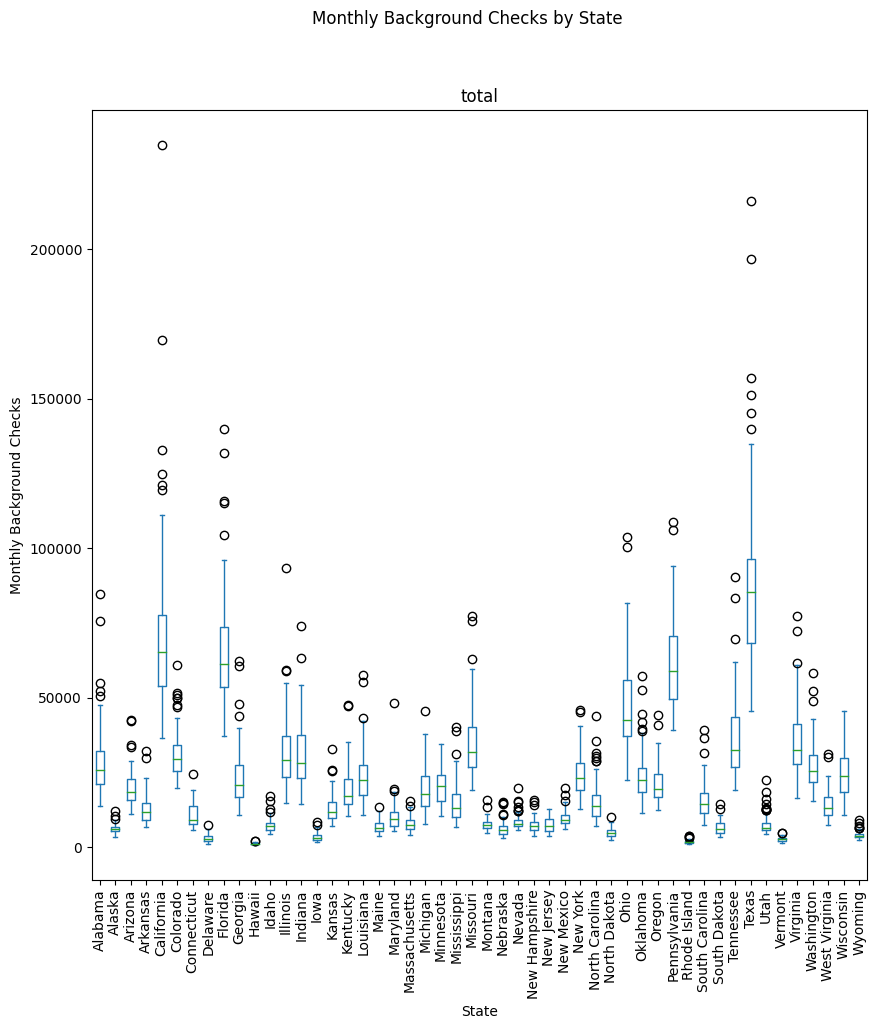

In [30]:
# Create a boxplot of the 2010-2016 data for initial view
df1.plot.box(column = 'total', by = 'state', rot = 90, figsize = (10, 10),
            title = 'Monthly Background Checks by State',
            ylabel = 'Monthly Background Checks', xlabel = 'State');

From the boxplot, it appears the Texas, California, Florida, Pennsylvania, and Ohio are contenders for the top ten. Determining the next five in the top ten will require sorting a list of means.

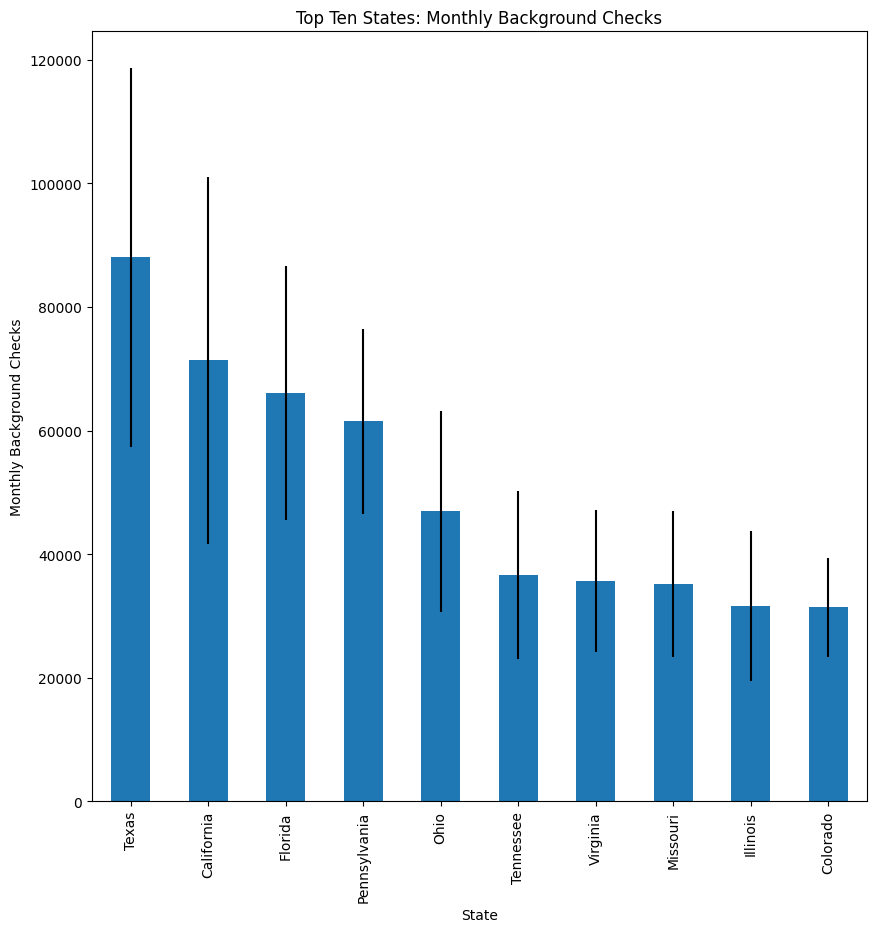

In [31]:
# Plot states with the 10 largest mean monthly background checks during 2010-2016
topten = df1.groupby(['state']).total.mean().sort_values(ascending = False)[:10].astype(int)
tts = topten.index.to_list()
dftopten = df1.query("state == @tts")

means = dftopten.groupby(['state']).total.mean().sort_values(ascending = False)
std = dftopten.groupby(['state']).total.std()

means.plot.bar(yerr = std, figsize = (10, 10), title = 'Top Ten States: Monthly Background Checks', 
                ylabel = 'Monthly Background Checks', xlabel = 'State');

In [32]:
# Show data from the above plot in tabular format
dftopten.groupby(['state']).total.describe().sort_values(by = 'mean', ascending = False).drop(columns = 'count').astype('int')

,mean,std,min,25%,50%,75%,max
state,,,,,,,
Texas,88016,30617,45692,68349,85410,96234,215936
California,71363,29640,36580,54027,65316,77774,234802
Florida,66106,20561,37228,53624,61371,73818,139982
Pennsylvania,61471,14950,39338,49471,58888,70712,108813
Ohio,46937,16250,22484,37117,42590,55942,103620
Tennessee,36631,13573,19010,26840,32442,43653,90450
Virginia,35640,11470,16652,27954,32450,41208,77487
Missouri,35159,11779,19047,26891,31847,40357,77415
Illinois,31613,12197,14912,23383,29085,37143,93310


The bar chart and above DataFrame show the top ten states for average monthly background checks. When sorted by rank, the means for two adjacent states are within one standard deviation of each other.

The top states on this list are states with large populations and large areas. Would the results be different if background checks were evaluated on a per-capita basis?

The following cells will calculate the average monthly number of background checks per capita by using the clean gun data and the US Census population estimates.

In [33]:
# Read clean version of US Census data as df2
df2 = pd.read_csv('us_census_data_clean.csv')
df2.set_index('Fact', inplace = True) # Reset the index from the loaded file

In [34]:
# Select NICS data from the time of the Census
df1 = df1.query("month.str.match('201[0-6]')")

# Identify states with census data from the US Census DataFrame
states = df2.columns[:]

# Create a new DataFrame with mean monthly NICS firearm checks from states with census data, transpose to match shape of df2
df3 = df1.groupby(['state']).total.mean().to_frame().T

# Insert Fact column with description into the new DataFrame and set the index to the 'Fact' column
df3.insert(0, 'Fact', ['Mean Monthly Background Checks, 2010-2016'])
df3 = df3.set_index('Fact')

In [35]:
# DataFrame of mean monthly background check data
df3

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Mean Monthly Background Checks, 2010-2016",28901.345238,6315.297619,19813.964286,13034.035714,71363.630952,31392.02381,10884.666667,2931.214286,66106.440476,23639.047619,...,6599.380952,36631.130952,88016.666667,7630.845238,2709.333333,35640.785714,27304.642857,14331.559524,24245.321429,4130.428571


In [36]:
# Calculation of Per Capita Monthly Background Checks
df4 = df2.query('Fact == "Population estimates, July 1, 2016,  (V2016)"')
df5 = df3 / df4.loc['Population estimates, July 1, 2016,  (V2016)']

# Reset the index to the description of the new 'Fact'
df5.rename(index={'Mean Monthly Background Checks, 2010-2016':'Per Capita Monthly Background Checks, 2010-2016'}, inplace = True)
df5

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Per Capita Monthly Background Checks, 2010-2016",0.005943,0.008512,0.002859,0.004362,0.001818,0.005666,0.003043,0.003079,0.003207,0.002293,...,0.007625,0.005507,0.003159,0.002501,0.004338,0.004237,0.003747,0.007827,0.004196,0.007055


In [39]:
# Concatenate the Census data with the mean monthly and per capita monthly NICS firearm check data
df_cmb = pd.concat([df2, df3, df5])

# Overview of combined NICS and Census datasets
print(df_cmb.shape)
print(df_cmb.info())

(66, 50)
<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Population estimates, July 1, 2016,  (V2016) to Per Capita Monthly Background Checks, 2010-2016
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Alabama         66 non-null     float64
 1   Alaska          66 non-null     float64
 2   Arizona         66 non-null     float64
 3   Arkansas        66 non-null     float64
 4   California      66 non-null     float64
 5   Colorado        66 non-null     float64
 6   Connecticut     66 non-null     float64
 7   Delaware        66 non-null     float64
 8   Florida         66 non-null     float64
 9   Georgia         66 non-null     float64
 10  Hawaii          66 non-null     float64
 11  Idaho           66 non-null     float64
 12  Illinois        66 non-null     float64
 13  Indiana         66 non-null     float64
 14  Iowa            66 non-null     float64
 15  Kansas          66 non-null     flo

In [40]:
# Sample DataFrame of combined NICS and Census datasets to confirm new Fact rows were appended
df_cmb

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4.863300e+06,741894.000000,6.931071e+06,2.988248e+06,3.925002e+07,5.540545e+06,3.576452e+06,952065.000000,2.061244e+07,1.031037e+07,...,865454.000000,6.651194e+06,2.786260e+07,3.051217e+06,624594.000000,8.411808e+06,7.288000e+06,1.831102e+06,5.778708e+06,585501.000000
"Population estimates base, April 1, 2010, (V2016)",4.780131e+06,710249.000000,6.392301e+06,2.916025e+06,3.725452e+07,5.029324e+06,3.574114e+06,897936.000000,1.880459e+07,9.688680e+06,...,814195.000000,6.346298e+06,2.514610e+07,2.763888e+06,625741.000000,8.001041e+06,6.724545e+06,1.853011e+06,5.687289e+06,563767.000000
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.700000e+00,4.500000,8.400000e+00,2.500000e+00,5.400000e+00,1.020000e+01,1.000000e-01,6.000000,9.600000e+00,6.400000e+00,...,6.300000,4.800000e+00,1.080000e+01,1.040000e+01,-0.200000,5.100000e+00,8.400000e+00,-1.200000e+00,1.600000e+00,3.900000
"Population, Census, April 1, 2010",4.779736e+06,710231.000000,6.392017e+06,2.915918e+06,3.725396e+07,5.029196e+06,3.574097e+06,897934.000000,1.880131e+07,9.687653e+06,...,814180.000000,6.346105e+06,2.514556e+07,2.763885e+06,625741.000000,8.001024e+06,6.724540e+06,1.852994e+06,5.686986e+06,563626.000000
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.000000e+00,7.300000,6.300000e+00,6.400000e+00,6.300000e+00,6.100000e+00,5.200000e+00,5.800000,5.500000e+00,6.400000e+00,...,7.100000,6.100000e+00,7.200000e+00,8.300000e+00,4.900000,6.100000e+00,6.200000e+00,5.500000e+00,5.800000e+00,6.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nonveteran-owned firms, 2012",3.169840e+05,56091.000000,4.275820e+05,1.929880e+05,3.176341e+06,4.695240e+05,2.811820e+05,60318.000000,1.846686e+06,8.005850e+05,...,66219.000000,4.693920e+05,2.057218e+06,2.198070e+05,63317.000000,5.484390e+05,4.614010e+05,9.496000e+04,3.707550e+05,51353.000000
"Population per square mile, 2010",9.440000e+01,1.200000,5.630000e+01,0.000000e+00,2.391000e+02,4.850000e+01,7.381000e+02,460.799988,3.506000e+02,1.684000e+02,...,10.700000,1.539000e+02,9.630000e+01,3.360000e+01,67.900002,2.026000e+02,1.012000e+02,7.710000e+01,1.050000e+02,5.800000
"Land area in square miles, 2010",5.064533e+04,570640.937500,1.135941e+05,5.203548e+04,1.557792e+05,1.036419e+05,4.842360e+03,1948.540039,5.362476e+04,5.751349e+04,...,75811.000000,4.123490e+04,2.612317e+05,8.216962e+04,9216.660156,3.949009e+04,6.645552e+04,2.403821e+04,5.415780e+04,97093.140625


In [37]:
# Save combined NICS and Census data as csv
df_cmb.to_csv('census_and_gun_data.csv')

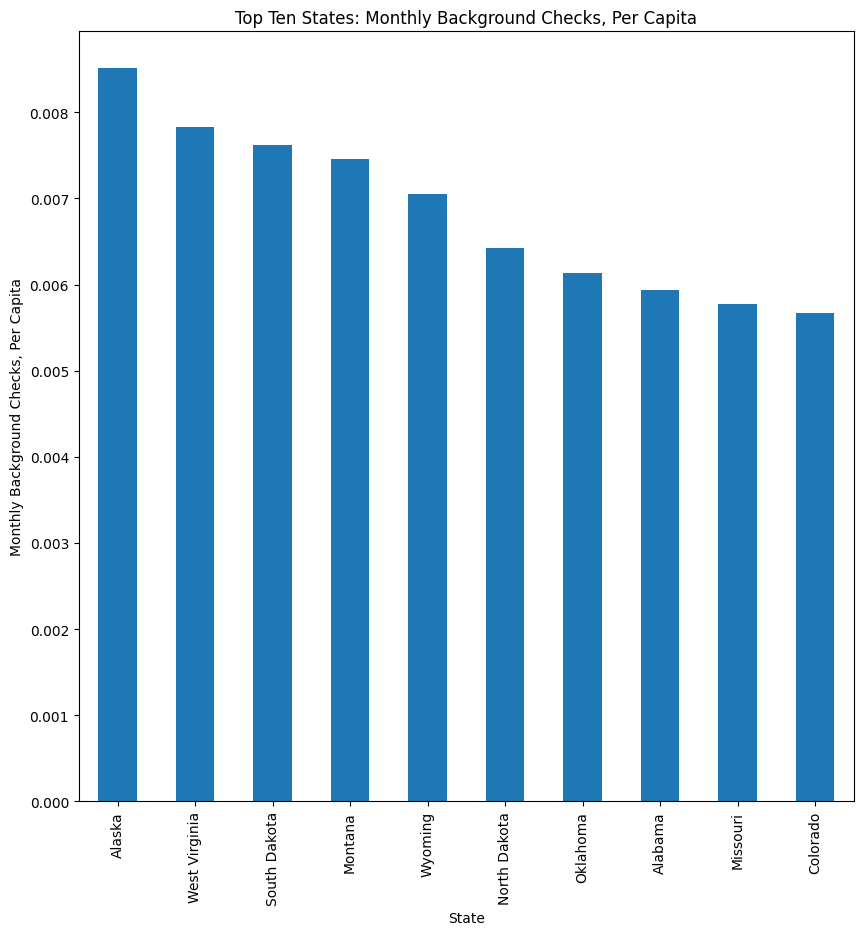

In [41]:
# Plot states with the 10 largest mean monthly background checks per capita during 2010-2016
pcmfc = df_cmb.loc['Per Capita Monthly Background Checks, 2010-2016'].sort_values(ascending = False)[0:10]
ttpc = pcmfc.index.to_list()

pcmfc.plot.bar(figsize = (10, 10), title = 'Top Ten States: Monthly Background Checks, Per Capita',
                ylabel = 'Monthly Background Checks, Per Capita', xlabel = 'State');

In [42]:
# Create a table showing top ten states by total monthly background checks versus per capita monthly background checks
pd.DataFrame({'Total Monthly Background Checks' : tts, 'Monthly Background Checks, Per Capita' : ttpc},
            index = range(1,11)).rename_axis(['Rank'])

,Total Monthly Background Checks,"Monthly Background Checks, Per Capita"
Rank,,
1,Texas,Alaska
2,California,West Virginia
3,Florida,South Dakota
4,Pennsylvania,Montana
5,Ohio,Wyoming
6,Tennessee,North Dakota
7,Virginia,Oklahoma
8,Missouri,Alabama
9,Illinois,Missouri


In [43]:
# Slice US Census data for population and population density
spop = df_cmb.loc['Population estimates, July 1, 2016,  (V2016)'].sort_values(ascending = False)[0:10]
spop

California        39250016.0
Texas             27862596.0
Florida           20612440.0
New York          19745288.0
Illinois          12801539.0
Pennsylvania      12784227.0
Ohio              11614373.0
Georgia           10310371.0
North Carolina    10146788.0
Michigan           9928300.0
Name: Population estimates, July 1, 2016,  (V2016), dtype: float64

In [44]:
# Calculate 2016 population density based on 2016 population estimates and Land area
# Sort and slice to give the states with the 10 lowest population densities
spopden = df_cmb.apply(lambda x : x.loc['Population estimates, July 1, 2016,  (V2016)'] / x.loc['Land area in square miles, 2010'], axis = 0).sort_values(ascending = True)[0:10]
spopden

Alaska           1.300107
Wyoming          6.030302
Montana          7.162831
North Dakota    10.984685
South Dakota    11.415942
New Mexico      17.156198
Idaho           20.366366
Nebraska        24.824426
Nevada          26.781075
Kansas          35.559376
dtype: float64

In [45]:
# Create a table showing top ten states by total population and population density
pop = spop.index.to_list()
popden = spopden.index.to_list()
pd.DataFrame({'Highest Population, 2016' : pop, 'Lowest Population Density, per square mile' : popden}, index = range(1,11)).rename_axis(['Rank'])

,"Highest Population, 2016","Lowest Population Density, per square mile"
Rank,,
1,California,Alaska
2,Texas,Wyoming
3,Florida,Montana
4,New York,North Dakota
5,Illinois,South Dakota
6,Pennsylvania,New Mexico
7,Ohio,Idaho
8,Georgia,Nebraska
9,North Carolina,Nevada


In [46]:
# Create new frame of Mean monthly background checks for all states
allbgc = df_cmb.loc['Mean Monthly Background Checks, 2010-2016']

# Create series of Per capita monthly background checks for all states
allbgcpc = df_cmb.loc['Per Capita Monthly Background Checks, 2010-2016']

# Create series of 2016 population estimates for all states
allpop = df_cmb.loc['Population estimates, July 1, 2016,  (V2016)']

# Create series of 2016 population density for all states
allpopden = df_cmb.apply(lambda x : x.loc['Population estimates, July 1, 2016,  (V2016)'] / x.loc['Land area in square miles, 2010'], axis = 0)
allpopden.rename('Population Density, 2016', inplace = True)

# Concatenate the data series
data3 = pd.concat([allpop, allbgc, allbgcpc, allpopden], axis = 1)
data3

,"Population estimates, July 1, 2016, (V2016)","Mean Monthly Background Checks, 2010-2016","Per Capita Monthly Background Checks, 2010-2016","Population Density, 2016"
Alabama,4863300.0,28901.345238,0.005943,96.026626
Alaska,741894.0,6315.297619,0.008512,1.300107
Arizona,6931071.0,19813.964286,0.002859,61.016130
Arkansas,2988248.0,13034.035714,0.004362,57.427124
California,39250016.0,71363.630952,0.001818,251.959256
Colorado,5540545.0,31392.023810,0.005666,53.458548
Connecticut,3576452.0,10884.666667,0.003043,738.576252
Delaware,952065.0,2931.214286,0.003079,488.604279
Florida,20612440.0,66106.440476,0.003207,384.382873
Georgia,10310371.0,23639.047619,0.002293,179.268747


In [47]:
# Concatenate Population Density and Per Capita Mean Monthly background check data
data2 = pd.concat([allpopden, allbgcpc], axis = 1)
data2

,"Population Density, 2016","Per Capita Monthly Background Checks, 2010-2016"
Alabama,96.026626,0.005943
Alaska,1.300107,0.008512
Arizona,61.016130,0.002859
Arkansas,57.427124,0.004362
California,251.959256,0.001818
Colorado,53.458548,0.005666
Connecticut,738.576252,0.003043
Delaware,488.604279,0.003079
Florida,384.382873,0.003207
Georgia,179.268747,0.002293


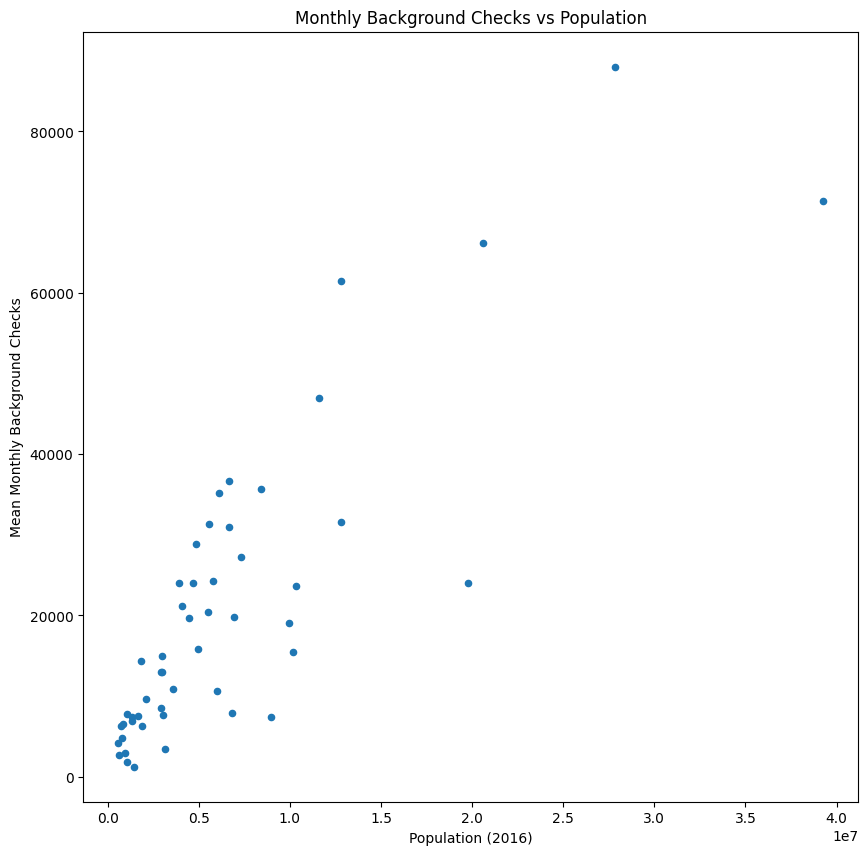

In [48]:
# Plot Mean Monthly Background Checks vs Population.
plot1 = data3.plot.scatter(x = 'Population estimates, July 1, 2016,  (V2016)',
                            y = 'Mean Monthly Background Checks, 2010-2016', figsize = (10,10),
                            title = 'Monthly Background Checks vs Population', xlabel = 'Population (2016)', 
                            ylabel = 'Mean Monthly Background Checks')

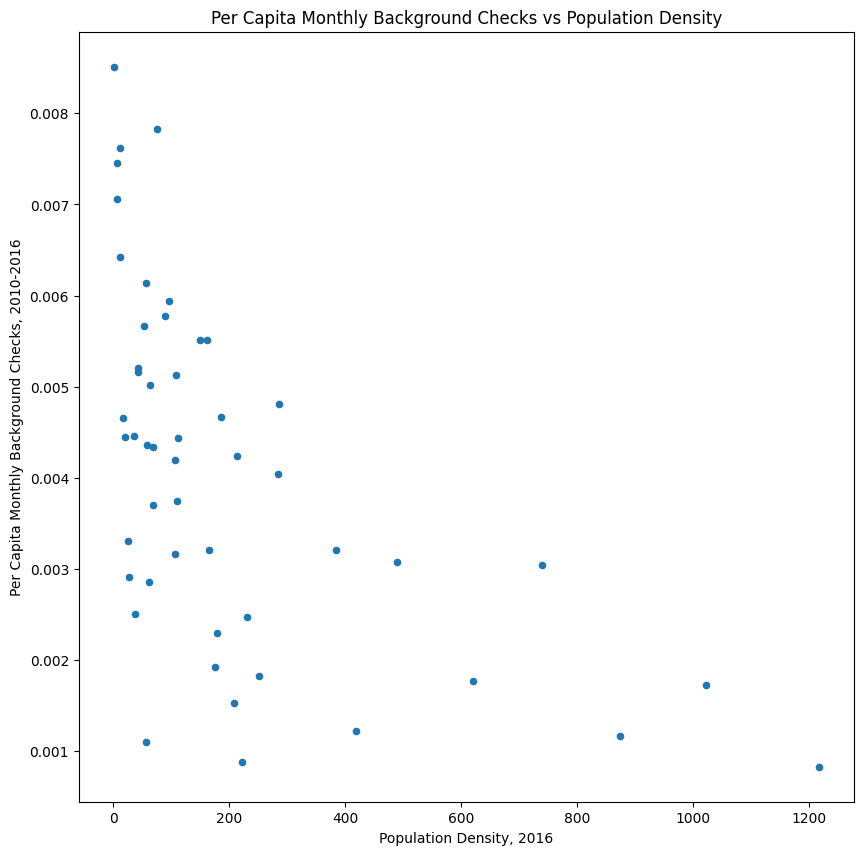

In [49]:
# Plot Per Capita Mean Monthly Background Checks vs Population Density.
plot2 = data3.plot.scatter(x = 'Population Density, 2016',
                            y = 'Per Capita Monthly Background Checks, 2010-2016',
                            figsize = (10,10), title = 'Per Capita Monthly Background Checks vs Population Density',
                            xlabel = 'Population Density, 2016', ylabel = 'Per Capita Monthly Background Checks, 2010-2016')

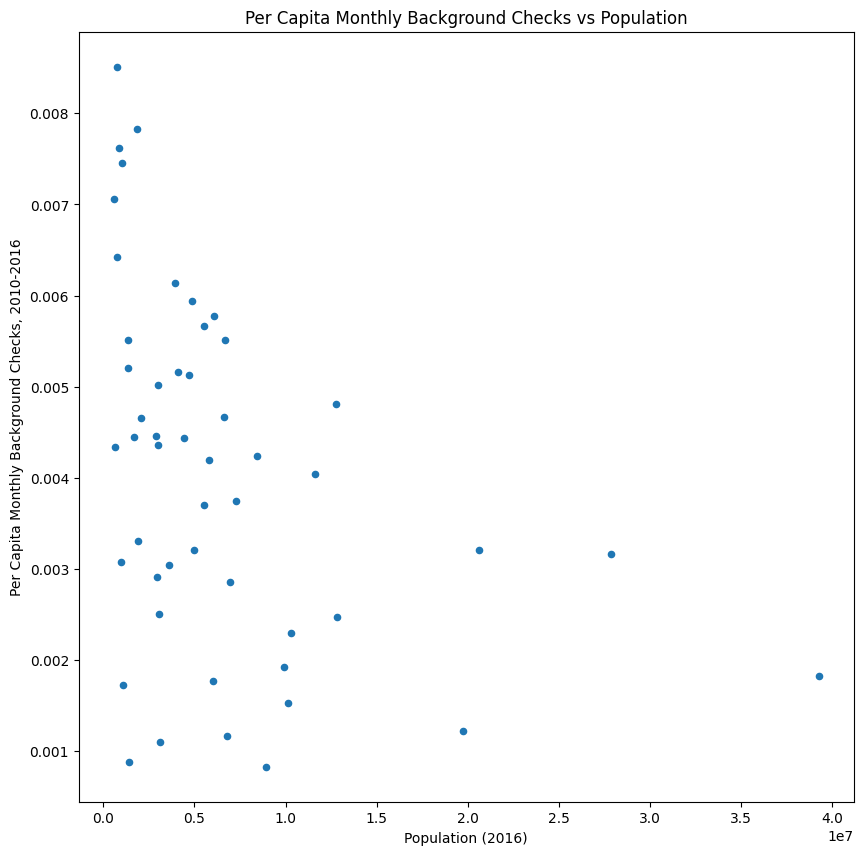

In [50]:
# Plot Per Capita Mean Monthly Background Checks vs Population.
plot3 = data3.plot.scatter(x = 'Population estimates, July 1, 2016,  (V2016)',
                            y = 'Per Capita Monthly Background Checks, 2010-2016',
                            figsize = (10,10), title = 'Per Capita Monthly Background Checks vs Population',
                            xlabel = 'Population (2016)', ylabel = 'Per Capita Monthly Background Checks, 2010-2016')

In [51]:
# Determine which states are not in both the top ten by population and total monthly background checks
spop.index.difference(topten.index)

Index(['Georgia', 'Michigan', 'New York', 'North Carolina'], dtype='object')

In [52]:
# Determine which states are not in both the top ten by lowest population density and per capita monthly background checks
spopden.index.difference(pcmfc.index)

Index(['Idaho', 'Kansas', 'Nebraska', 'Nevada', 'New Mexico'], dtype='object')

With the exception of Colorado and Missouri, the top ten states for total monthly number of background checks is different than the top ten states for per capita monthly backgorund checks. Six of the ten most populus states appear on the top ten list for mean monthly number of background checks. Five of the of top ten states on the per capita background check list make the top ten list for lowest population densities.

A Scatter plot of Background checks vs Population suggests a positive relationship exists between these two variables. This makes sense as a larger population would likely have a higher total number of background checks.

Scatter plots of Per capita background checks vs Population density and Per capita background checks vs Population appear to have a weak negative relationship (i.e., higher density, lower rate of background checks, and lower density, higher rate of background checks). This makes sense because rural, sparsely populated areas might have more recreation opportunities using firearms and different cultural values than densly populated states with large urban areas.

### Which states have had the largest increase in background checks from 2006 - 2016?

This question will be answered by:

1) Selecting data from 2006-2016
2) Removing territories and districts not in the census data
3) Grouping the monthly data by year and calculating the annual total number of background checks per state
4) Comparing the yearly totals versus the 2006 baseline
5) Identifying the top and bottom ten states by percent change in number of background checks

In [53]:
# Load dataset
df1 = pd.read_csv('gun_data_clean.csv')

# Select 2006-2016 gun data, create new DataFrame, drop districts and territories
df2l = df1.query("month.str.match('200[6-9]')")
df2r = df1.query("month.str.match('201[0-6]')")
df2 = pd.concat([df2l, df2r])
ds = ['Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'District of Columbia']
df2 = df2.drop(index = df2.query("state == @ds").index)

# Sample DataFrame
df2

,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,total
4730,2006-01,Alabama,0.0,7870.0,9813.0,0.0,379.0,0.0,0.0,0.0,18062.0
4731,2006-01,Alaska,0.0,1046.0,1403.0,0.0,53.0,0.0,0.0,0.0,2502.0
4732,2006-01,Arizona,1762.0,6256.0,6108.0,0.0,248.0,0.0,0.0,0.0,12612.0
4733,2006-01,Arkansas,678.0,3528.0,6563.0,0.0,248.0,0.0,0.0,0.0,10339.0
4734,2006-01,California,13173.0,19028.0,24054.0,0.0,538.0,0.0,0.0,0.0,43620.0
...,...,...,...,...,...,...,...,...,...,...,...
11985,2016-12,Virginia,1145.0,32572.0,27619.0,1308.0,0.0,0.0,0.0,0.0,61499.0
11986,2016-12,Washington,14178.0,21835.0,16484.0,1949.0,706.0,637.0,521.0,44.0,42176.0
11987,2016-12,West Virginia,1465.0,10869.0,11628.0,338.0,543.0,0.0,0.0,0.0,23378.0
11988,2016-12,Wisconsin,24129.0,16521.0,15036.0,818.0,37.0,0.0,0.0,0.0,32412.0


In [54]:
# Generate DataFrame of years 2006-2016, insert into df2 as a new column
y1 = df2['month'].str.extract('(200[6-9])').dropna()
y2 = df2['month'].str.extract('(201[0-6])').dropna()
years = pd.concat([y1, y2])

df2.insert(0, 'year', years)

# Change object datatypes to categories
df2[['year', 'month', 'state']] = df2[['year', 'month', 'state']].astype('category')

# Overview of DataFrame for selected firearm check data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6600 entries, 4730 to 11989
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   6600 non-null   category
 1   month                  6600 non-null   category
 2   state                  6600 non-null   category
 3   permit                 6600 non-null   float64 
 4   handgun                6600 non-null   float64 
 5   long_gun               6600 non-null   float64 
 6   other                  6600 non-null   float64 
 7   multiple               6600 non-null   float64 
 8   private_sale_handgun   6600 non-null   float64 
 9   private_sale_long_gun  6600 non-null   float64 
 10  private_sale_other     6600 non-null   float64 
 11  total                  6600 non-null   float64 
dtypes: category(3), float64(9)
memory usage: 549.3 KB


In [55]:
# Sample DataFrame for selected background check data
df2

,year,month,state,permit,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,total
4730,2006,2006-01,Alabama,0.0,7870.0,9813.0,0.0,379.0,0.0,0.0,0.0,18062.0
4731,2006,2006-01,Alaska,0.0,1046.0,1403.0,0.0,53.0,0.0,0.0,0.0,2502.0
4732,2006,2006-01,Arizona,1762.0,6256.0,6108.0,0.0,248.0,0.0,0.0,0.0,12612.0
4733,2006,2006-01,Arkansas,678.0,3528.0,6563.0,0.0,248.0,0.0,0.0,0.0,10339.0
4734,2006,2006-01,California,13173.0,19028.0,24054.0,0.0,538.0,0.0,0.0,0.0,43620.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11985,2016,2016-12,Virginia,1145.0,32572.0,27619.0,1308.0,0.0,0.0,0.0,0.0,61499.0
11986,2016,2016-12,Washington,14178.0,21835.0,16484.0,1949.0,706.0,637.0,521.0,44.0,42176.0
11987,2016,2016-12,West Virginia,1465.0,10869.0,11628.0,338.0,543.0,0.0,0.0,0.0,23378.0
11988,2016,2016-12,Wisconsin,24129.0,16521.0,15036.0,818.0,37.0,0.0,0.0,0.0,32412.0


In [56]:
# Sort data for total monthly background checks by year, create new DataFrame with result
s = df2.groupby(['year', 'state']).total.sum().to_frame()

# Sample DataFrame for selected data
s

total
year state                  
2006 Alabama        208042.0
     Alaska          43185.0
     Arizona        158381.0
     Arkansas       127285.0
     California     445463.0
...                      ...
2016 Virginia       518485.0
     Washington     409418.0
     West Virginia  182299.0
     Wisconsin      356605.0
     Wyoming         51168.0

[550 rows x 1 columns]

In [57]:
# Select 2006 totals to use as the baseline year, create new DataFrame with result
s06 = s.query("year == '2006'")

# Sample DataFrame of selected data
s06

total
year state                   
2006 Alabama         208042.0
     Alaska           43185.0
     Arizona         158381.0
     Arkansas        127285.0
     California      445463.0
     Colorado        202227.0
     Connecticut      52736.0
     Delaware         16694.0
     Florida         401191.0
     Georgia         244770.0
     Hawaii            7580.0
     Idaho            65305.0
     Illinois        161781.0
     Indiana         180263.0
     Iowa             46923.0
     Kansas          100088.0
     Kentucky        201658.0
     Louisiana       192381.0
     Maine            50633.0
     Maryland         59566.0
     Massachusetts    38992.0
     Michigan        189785.0
     Minnesota       174261.0
     Mississippi     151053.0
     Missouri        200775.0
     Montana          67547.0
     Nebraska         49919.0
     Nevada           59925.0
     New Hampshire    43928.0
     New Jersey       37288.0
     New Mexico       74747.0
     New York        157023.0
     North Carolina  149953.0
     North Dakota     34497.0
     Ohio            306931.0
     Oklahoma        159177.0
     Oregon          163160.0
     Pennsylvania    517853.0
     Rhode Island      9913.0
     South Carolina  113258.0
     South Dakota     49222.0
     Tennessee       230501.0
     Texas           586670.0
     Utah             86097.0
     Vermont          20713.0
     Virginia        238857.0
     Washington      170193.0
     West Virginia   108923.0
     Wisconsin       186810.0
     Wyoming          35389.0

In [58]:
# Create MultiIndex object (sidx) to use as keys for dictionary of calculated % Change values
# Create dictionary (pc) to receive keys and values
sidx = s.index
pc = dict()

# Iterate through MultiIndex (sidx), retreive "total" values for each state from the baseline year DataFrame (s06) and all years DataFrame (s)
# Calculate the % Change and store in the dictionary (pc)
for t in sidx:
    v = s.xs(t).total
    bl = s06.xs(('2006', t[1])).total
    pc[t] = (v - bl) / bl * 100

# Nest % Change dictionary (pc) in dictionary to provide desired MultiIndex level structure for later analysis
pcd = {("% Change"): pc}

# Nested dictionaries
pcd

{'% Change': {('2006', 'Alabama'): 0.0,
  ('2006', 'Alaska'): 0.0,
  ('2006', 'Arizona'): 0.0,
  ('2006', 'Arkansas'): 0.0,
  ('2006', 'California'): 0.0,
  ('2006', 'Colorado'): 0.0,
  ('2006', 'Connecticut'): 0.0,
  ('2006', 'Delaware'): 0.0,
  ('2006', 'Florida'): 0.0,
  ('2006', 'Georgia'): 0.0,
  ('2006', 'Hawaii'): 0.0,
  ('2006', 'Idaho'): 0.0,
  ('2006', 'Illinois'): 0.0,
  ('2006', 'Indiana'): 0.0,
  ('2006', 'Iowa'): 0.0,
  ('2006', 'Kansas'): 0.0,
  ('2006', 'Kentucky'): 0.0,
  ('2006', 'Louisiana'): 0.0,
  ('2006', 'Maine'): 0.0,
  ('2006', 'Maryland'): 0.0,
  ('2006', 'Massachusetts'): 0.0,
  ('2006', 'Michigan'): 0.0,
  ('2006', 'Minnesota'): 0.0,
  ('2006', 'Mississippi'): 0.0,
  ('2006', 'Missouri'): 0.0,
  ('2006', 'Montana'): 0.0,
  ('2006', 'Nebraska'): 0.0,
  ('2006', 'Nevada'): 0.0,
  ('2006', 'New Hampshire'): 0.0,
  ('2006', 'New Jersey'): 0.0,
  ('2006', 'New Mexico'): 0.0,
  ('2006', 'New York'): 0.0,
  ('2006', 'North Carolina'): 0.0,
  ('2006', 'North Dakota'

In [59]:
# Create DataFrame of % Change values from nested dictionaries (pcd)
dfpc = pd.DataFrame.from_dict(pcd)

# Assign names to the MultiIndex
dfpc.rename_axis(index=["year", "state"], inplace = True)

# Sample DataFrame of % Change values
dfpc

% Change
year state                    
2006 Alabama          0.000000
     Alaska           0.000000
     Arizona          0.000000
     Arkansas         0.000000
     California       0.000000
...                        ...
2016 Virginia       117.069209
     Washington     140.561010
     West Virginia   67.365019
     Wisconsin       90.891815
     Wyoming         44.587301

[550 rows x 1 columns]

In [60]:
# Rearrange axes of the DataFrame with '% Change' values for a better veiw of the data
spcu = dfpc.unstack(level=0)

# Sample DataFrame of '% Change' values. Note baseline year is 0% change, as expected
spcu

% Change                                              \
year               2006       2007       2008       2009       2010   
state                                                                 
Alabama             0.0   1.130541  25.850069  31.920958  25.319887   
Alaska              0.0   6.525414  34.039597  31.635985  41.810814   
Arizona             0.0  -7.905620  -1.221106   0.683794   3.603336   
Arkansas            0.0  -4.934596   3.895981   6.287465  -1.026044   
California          0.0  29.783394  -0.073182  11.568862  16.870986   
Colorado            0.0   8.123050  41.187873  55.093039  42.360318   
Connecticut         0.0  12.412773  42.487106  67.123028  67.932721   
Delaware            0.0  -4.684318   8.434168  22.978316  15.250988   
Florida             0.0   3.557906  21.521171  33.265203  33.249998   
Georgia             0.0 -19.700127 -10.107039 -13.320668 -18.214242   
Hawaii              0.0 -14.102902  12.955145  38.667546  38.878628   
Idaho               0.0   3.762346  12.192022   5.630503   2.656764   
Illinois            0.0  -0.073556  16.341227  38.262837  43.157107   
Indiana             0.0   0.834891  19.013885  31.148932  29.843063   
Iowa                0.0  -8.364768  -7.927882 -10.120836 -12.256250   
Kansas              0.0   3.414995  18.049117  34.177923  29.893694   
Kentucky            0.0  -4.879549   0.180504   2.191334  -5.140882   
Louisiana           0.0  -1.896237  18.600070  17.425837  11.586383   
Maine               0.0  -3.221219   7.042838  15.574823  24.606482   
Maryland            0.0  13.517779  41.978646  56.765605  44.124165   
Massachusetts       0.0   2.423574  14.261900  39.538880  47.235330   
Michigan            0.0 -11.174223 -11.051453 -13.943673 -21.215059   
Minnesota           0.0  -3.299648   2.218511   5.166962   3.202093   
Mississippi         0.0  -5.764864  -1.870867  -9.838269 -10.235480   
Missouri            0.0  11.538289  45.932512  59.528328  50.016685   
Montana             0.0   4.195597  12.314388  14.154589  12.302545   
Nebraska            0.0   1.971193  10.933713  16.424608  14.002684   
Nevada              0.0  -3.956612  35.018773  50.930330  44.255319   
New Hampshire       0.0   0.830905  13.950100  30.456656  29.719086   
New Jersey          0.0  -2.480691   8.568440  48.881678  35.467174   
New Mexico          0.0   4.113877  20.133249  19.080364  18.122466   
New York            0.0   9.569299  18.522764  31.657146  34.531884   
North Carolina      0.0  -5.226971   1.969951  -2.968263  -9.435623   
North Dakota        0.0   7.383251  19.224860  14.708525  18.482767   
Ohio                0.0   0.663015   8.216179  22.314462  20.832695   
Oklahoma            0.0  -0.305949  19.468265  25.721053  22.704913   
Oregon              0.0  -0.672346   9.879260  12.989090  12.986639   
Pennsylvania        0.0   8.129913  15.051376  23.474615  20.517599   
Rhode Island        0.0   3.076768  25.138707  49.288813  49.651972   
South Carolina      0.0  -0.330219  22.506136  28.335305  19.031768   
South Dakota        0.0   3.177441  20.149527  22.563082  20.519280   
Tennessee           0.0   4.876335  22.638513  33.874040  33.652349   
Texas               0.0   1.846353  28.159442  30.946870  24.680826   
Utah                0.0   0.312438   4.004785  -4.834082 -16.871668   
Vermont             0.0  -3.678849   6.170038  11.451745  17.201757   
Virginia            0.0   1.112800  16.792893  24.117359  34.299183   
Washington          0.0   5.599525  26.397090  35.951537  34.965598   
West Virginia       0.0  -3.898167   9.081645  15.185957  15.505449   
Wisconsin           0.0  -4.576307  -1.321664   3.887907   2.370858   
Wyoming             0.0   1.268756  16.643590  13.572014   5.114584   

                                                                           \
year                 2011        2012        2013        2014        2015   
state                                                                       
Alabama         37.0

In [61]:
# List of top ten states with the largest change in monthly NICS firearm checks from 2006-2016 
lstt = spcu.xs(('% Change', '2016'), axis = 1).sort_values(ascending = False)[:10].to_frame().astype('int')
lstt

,% Change
,2016
state,
Illinois,234
Massachusetts,229
New Jersey,226
Connecticut,219
Delaware,202
California,197
Rhode Island,177
Indiana,167


In [63]:
#List of bottom ten states with the smallest change in monthly NICS firearm checks from 2006-2016. 
lstb = spcu.xs(('% Change', '2016'), axis = 1).sort_values(ascending = False)[-10:].to_frame().astype('int')
lstb

,% Change
,2016
state,
Montana,46
Mississippi,46
Wyoming,44
Alabama,38
Georgia,37
North Carolina,37
Arkansas,33
Kentucky,29


In [64]:
# Create indexes for top ten and bottom ten states
tt = lstt.index
bt = lstb.index

# Create DataFrame with % Change data for top ten states
dftt = spcu.query('@tt')
dftt = dftt.swapaxes("index", "columns").droplevel(level = 0)

# Create DataFrame with % Change data for bottom ten states
dfbt = spcu.query('@bt')
dfbt = dfbt.swapaxes("index", "columns").droplevel(level = 0)

# Sample DataFrame of top ten state data
dftt

state,Illinois,Massachusetts,New Jersey,Connecticut,Delaware,California,Rhode Island,Indiana,New Hampshire,Florida
year,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007,-0.073556,2.423574,-2.480691,12.412773,-4.684318,29.783394,3.076768,0.834891,0.830905,3.557906
2008,16.341227,14.261900,8.568440,42.487106,8.434168,-0.073182,25.138707,19.013885,13.950100,21.521171
2009,38.262837,39.538880,48.881678,67.123028,22.978316,11.568862,49.288813,31.148932,30.456656,33.265203
2010,43.157107,47.235330,35.467174,67.932721,15.250988,16.870986,49.651972,29.843063,29.719086,33.249998
2011,69.969279,78.685371,61.574769,75.161180,34.665149,40.155973,74.225764,52.464455,47.391186,52.424157
2012,126.147693,143.260156,130.234928,127.705931,83.437163,79.495267,142.610713,109.727454,116.397286,100.123383
2013,167.026412,176.231022,222.009762,148.209951,126.985743,109.792508,168.536266,130.975852,136.018030,117.035527
2014,147.206409,153.921317,147.583673,164.841854,140.906913,105.224227,104.731161,111.435514,99.018849,95.980967


In [65]:
# Sample DataFrame of bottom ten state data
dfbt

state,Montana,Mississippi,Wyoming,Alabama,Georgia,North Carolina,Arkansas,Kentucky,Utah,Iowa
year,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007,4.195597,-5.764864,1.268756,1.130541,-19.700127,-5.226971,-4.934596,-4.879549,0.312438,-8.364768
2008,12.314388,-1.870867,16.643590,25.850069,-10.107039,1.969951,3.895981,0.180504,4.004785,-7.927882
2009,14.154589,-9.838269,13.572014,31.920958,-13.320668,-2.968263,6.287465,2.191334,-4.834082,-10.120836
2010,12.302545,-10.235480,5.114584,25.319887,-18.214242,-9.435623,-1.026044,-5.140882,-16.871668,-12.256250
2011,22.587236,-2.127730,22.993020,37.069919,-3.748417,4.715478,8.343481,5.214770,-5.981625,-8.200669
2012,51.744711,21.481864,53.358388,80.197268,21.501409,38.039252,33.391209,27.711769,15.739224,1.314920
2013,52.615216,26.008752,66.082681,98.905509,24.935654,45.191493,37.749146,28.987692,19.805568,-6.527716
2014,35.887604,14.218188,43.976942,75.512156,14.731380,23.740772,16.928153,9.756122,-2.253272,-19.536262


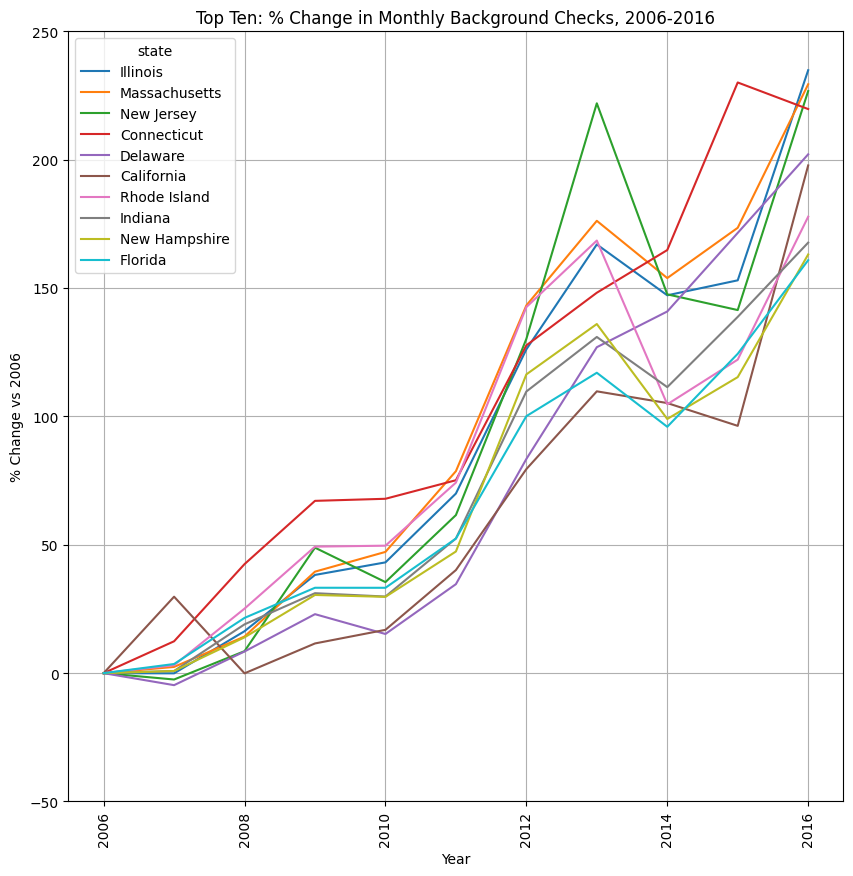

In [66]:
# Plot of % Change in background checks from 2006-2016 for the top ten states
ttplot = dftt.plot.line(legend = True, rot = 90, ylabel = '% Change vs 2006', grid = True,
                        ylim = (-50, 250), figsize = (10,10), xlabel = 'Year',
                        title = 'Top Ten: % Change in Monthly Background Checks, 2006-2016')

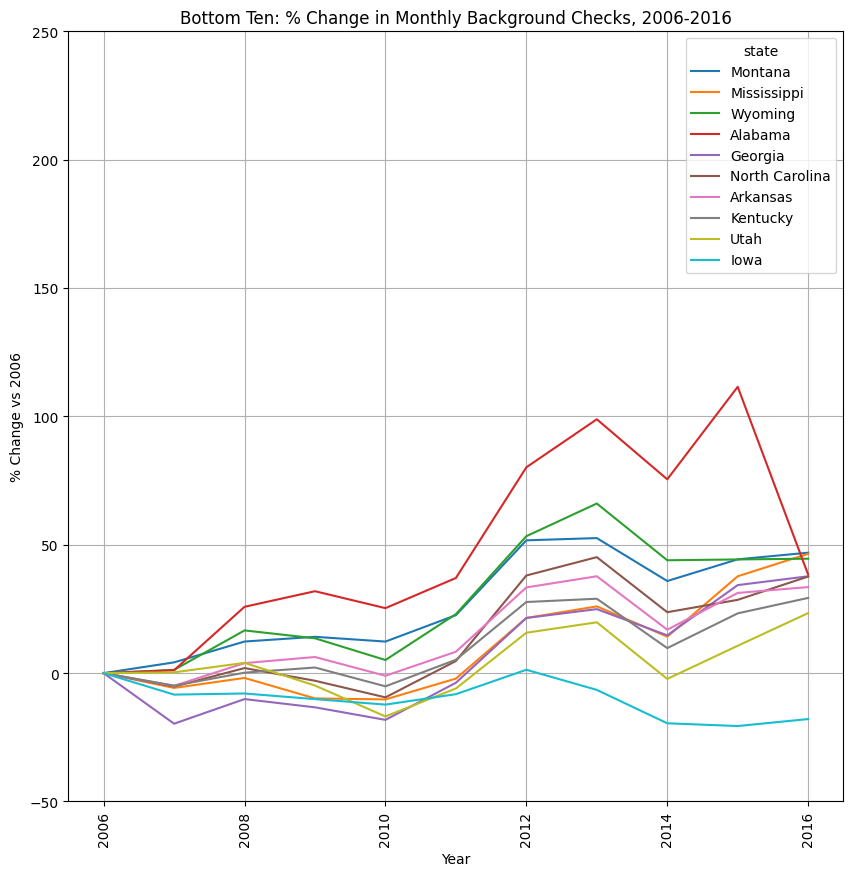

In [67]:
# Plot of % Change in backgroung checks from 2006-2016 for the top ten states
btplot = dfbt.plot.line(legend = True, rot = 90, ylabel = '% Change vs 2006', grid = True,
                        ylim = (-50, 250), figsize = (10,10), xlabel = 'Year',
                        title = 'Bottom Ten: % Change in Monthly Background Checks, 2006-2016')

With the exception of Illinois, California, and Florida, states with the largest increase in the number of background checks are different than states with the top ten total monthly background checks and per capita monthly background checks. Montana, Wyoming, and Alabama have high per capita background check rates, but have low growth in the monthly number of background checks relative to other states. Could this be explained by trends in population growth? A comparison of population change vs change in number of background checks might help better understand these results.

### Are there any potential relationships between the change in background checks and other changes in the population?

The previous two questions can be better understood upon visualization of any potentail relationships between population trands and changes in background checks.

This quesiton will be answered by:

1) Appending the calculated % Change data to the US Census dataset
2) Identifying potential US Census data of interest for evaluating possible relationships with background check data
3) Plotting US Census data versus Background check data

In [68]:
# Load census and gun data set as df1
df1 = pd.read_csv('census_and_gun_data.csv', index_col = 0)
df1

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4.863300e+06,741894.000000,6.931071e+06,2.988248e+06,3.925002e+07,5.540545e+06,3.576452e+06,952065.000000,2.061244e+07,1.031037e+07,...,865454.000000,6.651194e+06,2.786260e+07,3.051217e+06,624594.000000,8.411808e+06,7.288000e+06,1.831102e+06,5.778708e+06,585501.000000
"Population estimates base, April 1, 2010, (V2016)",4.780131e+06,710249.000000,6.392301e+06,2.916025e+06,3.725452e+07,5.029324e+06,3.574114e+06,897936.000000,1.880459e+07,9.688680e+06,...,814195.000000,6.346298e+06,2.514610e+07,2.763888e+06,625741.000000,8.001041e+06,6.724545e+06,1.853011e+06,5.687289e+06,563767.000000
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.700000e+00,4.500000,8.400000e+00,2.500000e+00,5.400000e+00,1.020000e+01,1.000000e-01,6.000000,9.600000e+00,6.400000e+00,...,6.300000,4.800000e+00,1.080000e+01,1.040000e+01,-0.200000,5.100000e+00,8.400000e+00,-1.200000e+00,1.600000e+00,3.900000
"Population, Census, April 1, 2010",4.779736e+06,710231.000000,6.392017e+06,2.915918e+06,3.725396e+07,5.029196e+06,3.574097e+06,897934.000000,1.880131e+07,9.687653e+06,...,814180.000000,6.346105e+06,2.514556e+07,2.763885e+06,625741.000000,8.001024e+06,6.724540e+06,1.852994e+06,5.686986e+06,563626.000000
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.000000e+00,7.300000,6.300000e+00,6.400000e+00,6.300000e+00,6.100000e+00,5.200000e+00,5.800000,5.500000e+00,6.400000e+00,...,7.100000,6.100000e+00,7.200000e+00,8.300000e+00,4.900000,6.100000e+00,6.200000e+00,5.500000e+00,5.800000e+00,6.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nonveteran-owned firms, 2012",3.169840e+05,56091.000000,4.275820e+05,1.929880e+05,3.176341e+06,4.695240e+05,2.811820e+05,60318.000000,1.846686e+06,8.005850e+05,...,66219.000000,4.693920e+05,2.057218e+06,2.198070e+05,63317.000000,5.484390e+05,4.614010e+05,9.496000e+04,3.707550e+05,51353.000000
"Population per square mile, 2010",9.440000e+01,1.200000,5.630000e+01,0.000000e+00,2.391000e+02,4.850000e+01,7.381000e+02,460.799988,3.506000e+02,1.684000e+02,...,10.700000,1.539000e+02,9.630000e+01,3.360000e+01,67.900002,2.026000e+02,1.012000e+02,7.710000e+01,1.050000e+02,5.800000
"Land area in square miles, 2010",5.064533e+04,570640.937500,1.135941e+05,5.203548e+04,1.557792e+05,1.036419e+05,4.842360e+03,1948.540039,5.362476e+04,5.751349e+04,...,75811.000000,4.123490e+04,2.612317e+05,8.216962e+04,9216.660156,3.949009e+04,6.645552e+04,2.403821e+04,5.415780e+04,97093.140625


In [69]:
# Select and prepare the percent change data calculated above for insertion into the US Census dataset
pc2016 = spcu.xs(('% Change', '2016'), axis = 1).to_frame().T
pc2016.insert(0, 'Fact', '% Change, Monthly Background Checks Per Capita, 2016 vs 2006')
pc2016.set_index('Fact', inplace = True)
pc2016

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"% Change, Monthly Background Checks Per Capita, 2016 vs 2006",38.373982,84.52935,87.487767,33.531052,197.805205,123.862788,219.772072,202.138493,160.882472,37.739919,...,85.699484,136.629342,103.375151,23.394543,90.035244,117.069209,140.56101,67.365019,90.891815,44.587301


In [71]:
# Insert % Change data into US Census dataset
df2 = pd.concat([df1, pc2016])
df2

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4.863300e+06,741894.000000,6.931071e+06,2.988248e+06,3.925002e+07,5.540545e+06,3.576452e+06,952065.000000,2.061244e+07,1.031037e+07,...,865454.000000,6.651194e+06,2.786260e+07,3.051217e+06,624594.000000,8.411808e+06,7.288000e+06,1.831102e+06,5.778708e+06,585501.000000
"Population estimates base, April 1, 2010, (V2016)",4.780131e+06,710249.000000,6.392301e+06,2.916025e+06,3.725452e+07,5.029324e+06,3.574114e+06,897936.000000,1.880459e+07,9.688680e+06,...,814195.000000,6.346298e+06,2.514610e+07,2.763888e+06,625741.000000,8.001041e+06,6.724545e+06,1.853011e+06,5.687289e+06,563767.000000
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.700000e+00,4.500000,8.400000e+00,2.500000e+00,5.400000e+00,1.020000e+01,1.000000e-01,6.000000,9.600000e+00,6.400000e+00,...,6.300000,4.800000e+00,1.080000e+01,1.040000e+01,-0.200000,5.100000e+00,8.400000e+00,-1.200000e+00,1.600000e+00,3.900000
"Population, Census, April 1, 2010",4.779736e+06,710231.000000,6.392017e+06,2.915918e+06,3.725396e+07,5.029196e+06,3.574097e+06,897934.000000,1.880131e+07,9.687653e+06,...,814180.000000,6.346105e+06,2.514556e+07,2.763885e+06,625741.000000,8.001024e+06,6.724540e+06,1.852994e+06,5.686986e+06,563626.000000
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.000000e+00,7.300000,6.300000e+00,6.400000e+00,6.300000e+00,6.100000e+00,5.200000e+00,5.800000,5.500000e+00,6.400000e+00,...,7.100000,6.100000e+00,7.200000e+00,8.300000e+00,4.900000,6.100000e+00,6.200000e+00,5.500000e+00,5.800000e+00,6.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Population per square mile, 2010",9.440000e+01,1.200000,5.630000e+01,0.000000e+00,2.391000e+02,4.850000e+01,7.381000e+02,460.799988,3.506000e+02,1.684000e+02,...,10.700000,1.539000e+02,9.630000e+01,3.360000e+01,67.900002,2.026000e+02,1.012000e+02,7.710000e+01,1.050000e+02,5.800000
"Land area in square miles, 2010",5.064533e+04,570640.937500,1.135941e+05,5.203548e+04,1.557792e+05,1.036419e+05,4.842360e+03,1948.540039,5.362476e+04,5.751349e+04,...,75811.000000,4.123490e+04,2.612317e+05,8.216962e+04,9216.660156,3.949009e+04,6.645552e+04,2.403821e+04,5.415780e+04,97093.140625
"Mean Monthly Background Checks, 2010-2016",2.890135e+04,6315.297619,1.981396e+04,1.303404e+04,7.136363e+04,3.139202e+04,1.088467e+04,2931.214286,6.610644e+04,2.363905e+04,...,6599.380952,3.663113e+04,8.801667e+04,7.630845e+03,2709.333333,3.564079e+04,2.730464e+04,1.433156e+04,2.424532e+04,4130.428571


The following US Census data were identified for plotting against Background check data to determine if there are possible positive or negative relationships:

* 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'
* 'Median value of owner-occupied housing units, 2011-2015'
* 'Median gross rent, 2011-2015'
* 'Building permits, 2016'
* 'High school graduate or higher, percent of persons age 25 years+, 2011-2015'
* "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"
* 'Persons  without health insurance, under age 65 years, percent'
* 'In civilian labor force, total, percent of population age 16 years+, 2011-2015'
* 'Median household income (in 2015 dollars), 2011-2015'
* 'Per capita income in past 12 months (in 2015 dollars), 2011-2015'

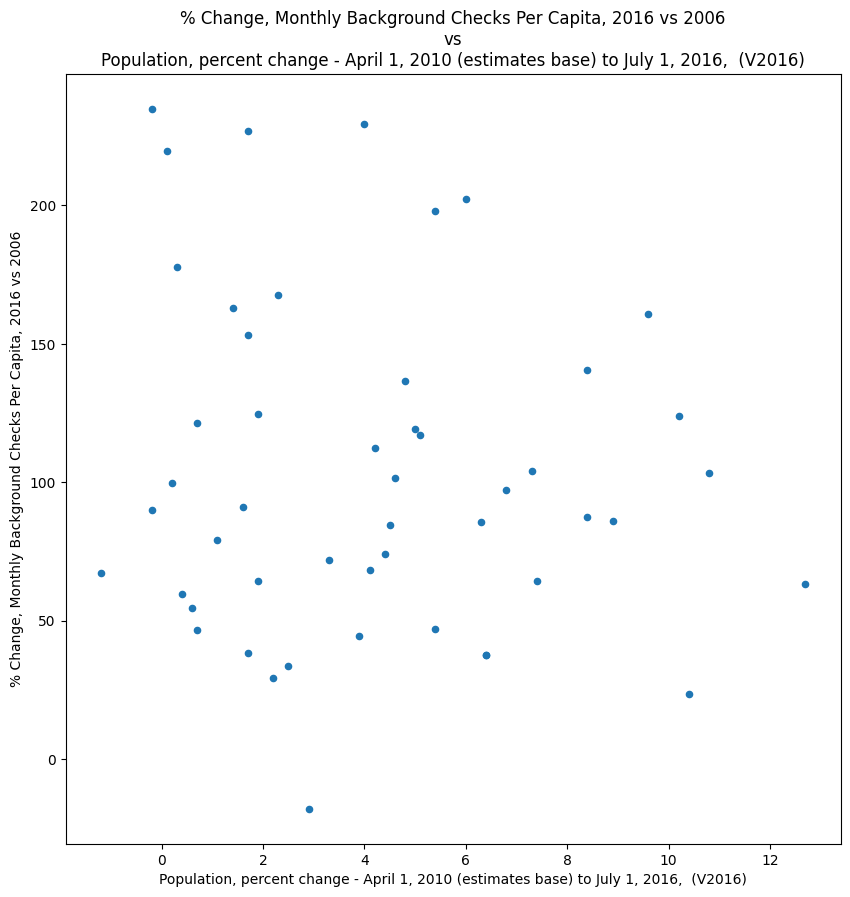

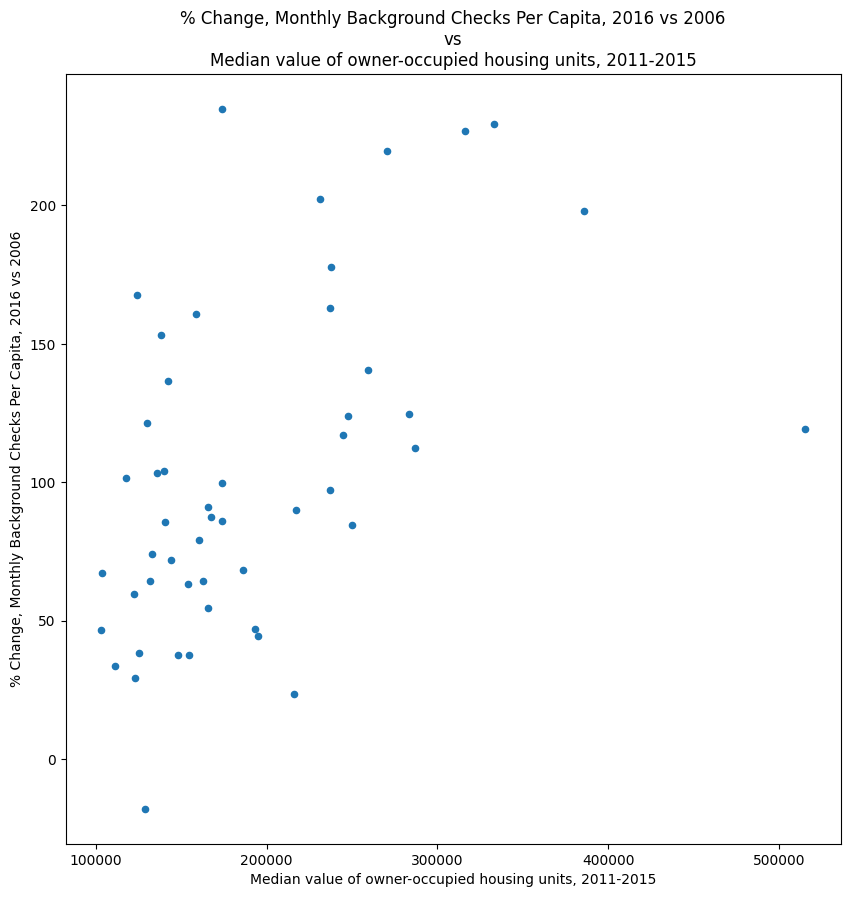

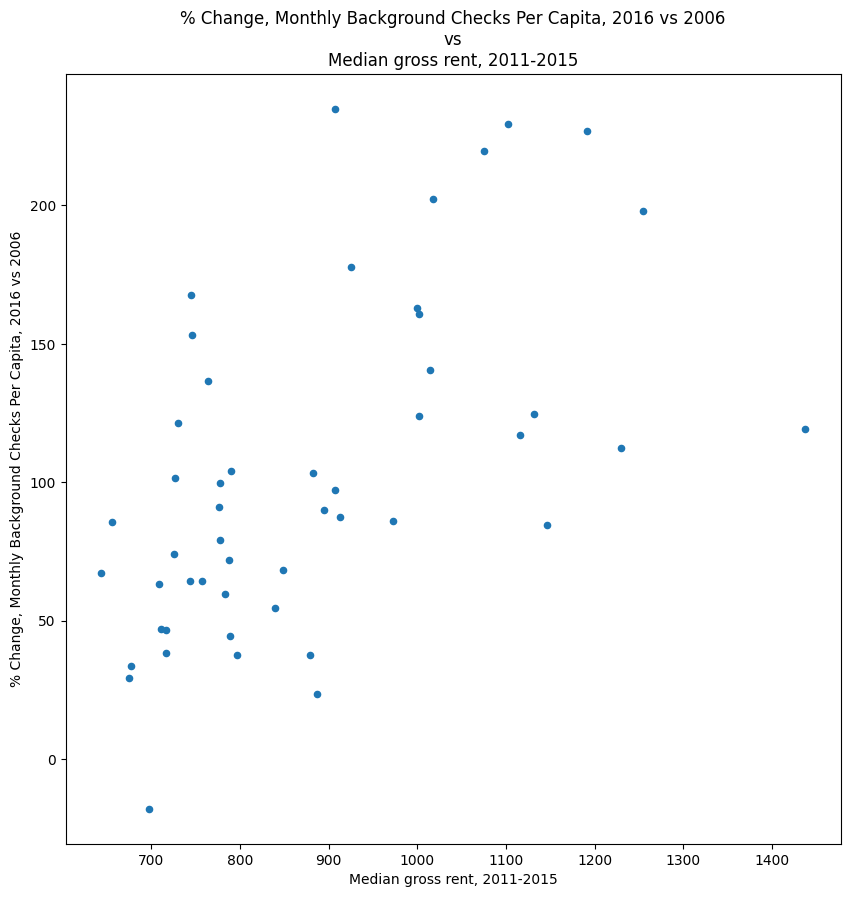

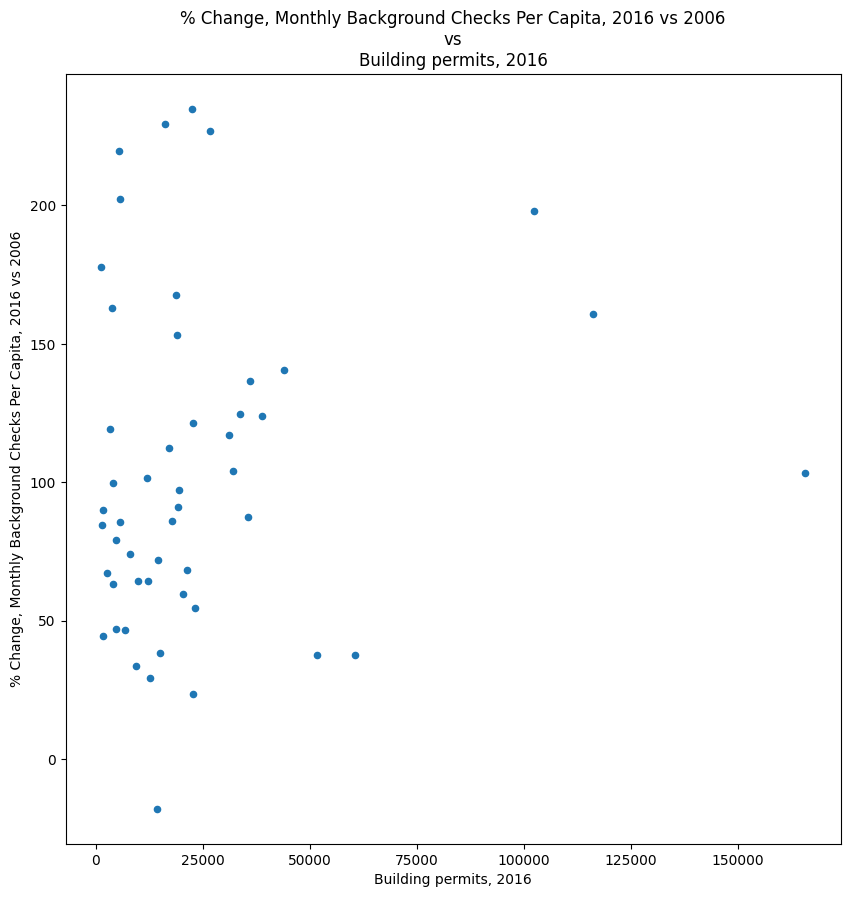

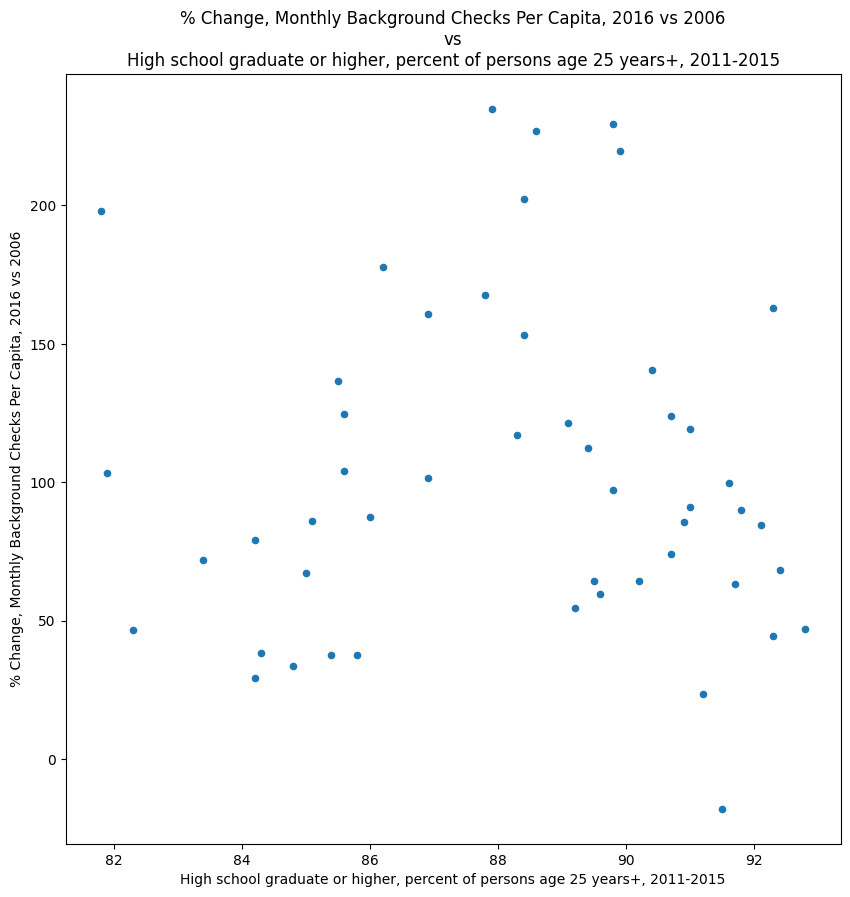

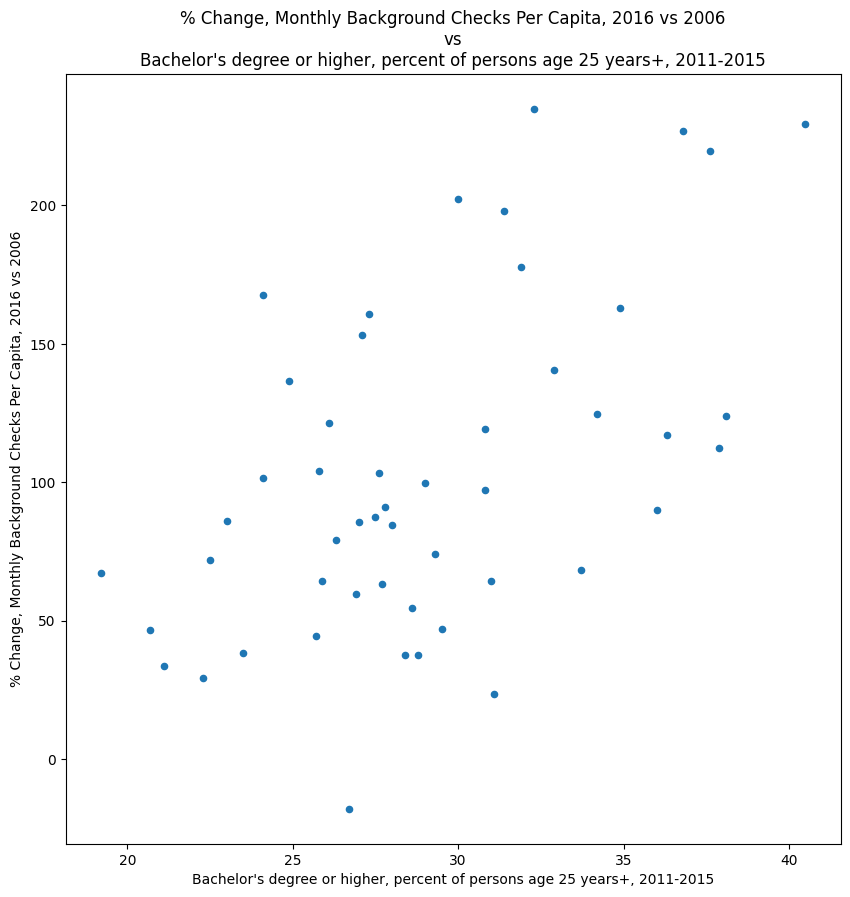

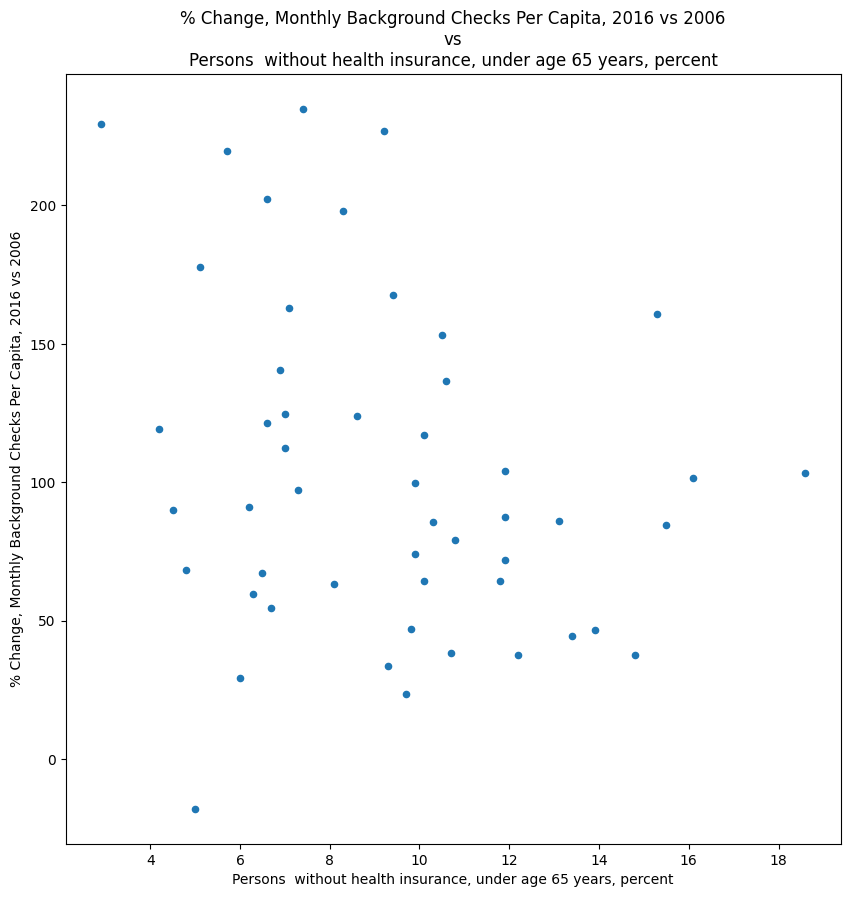

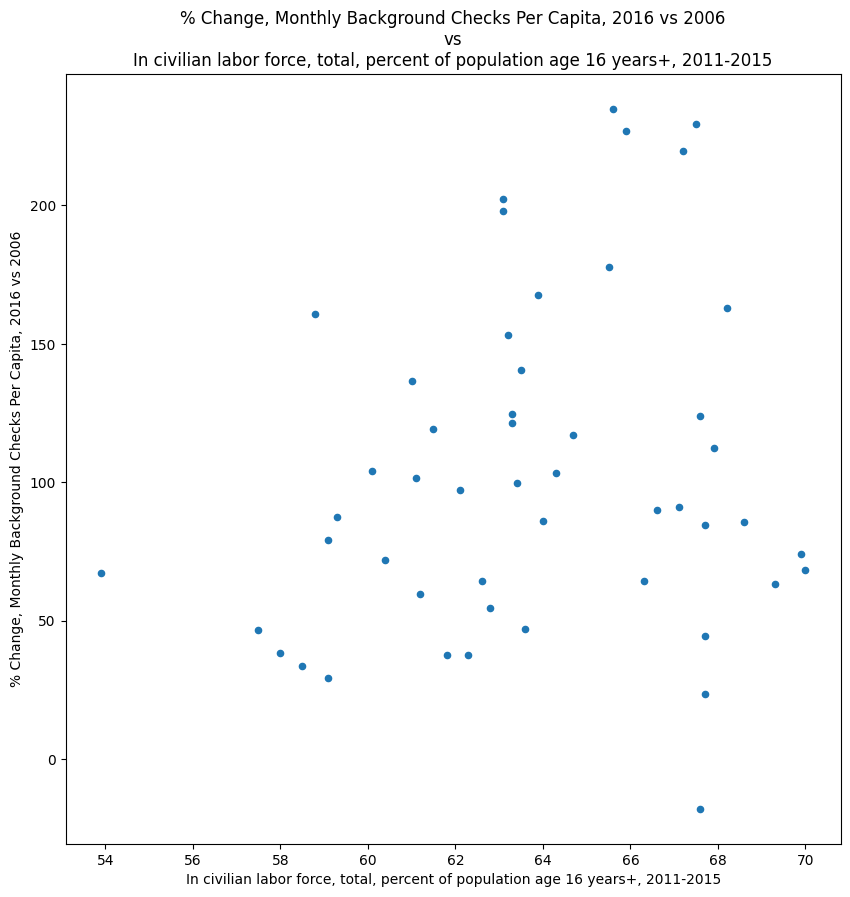

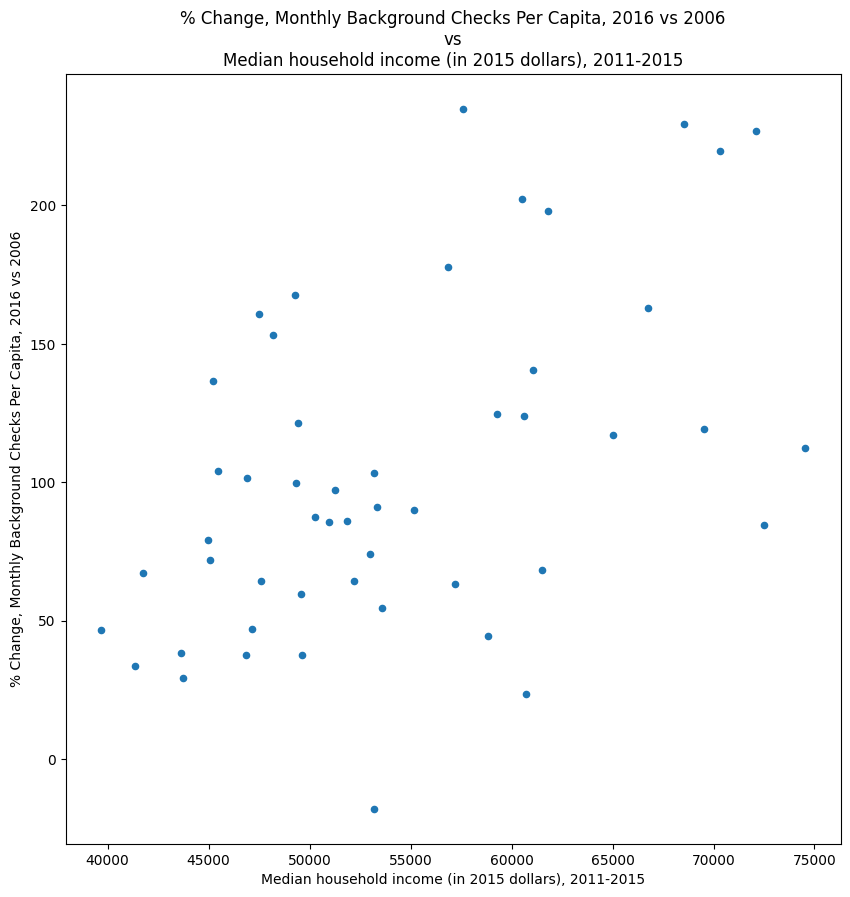

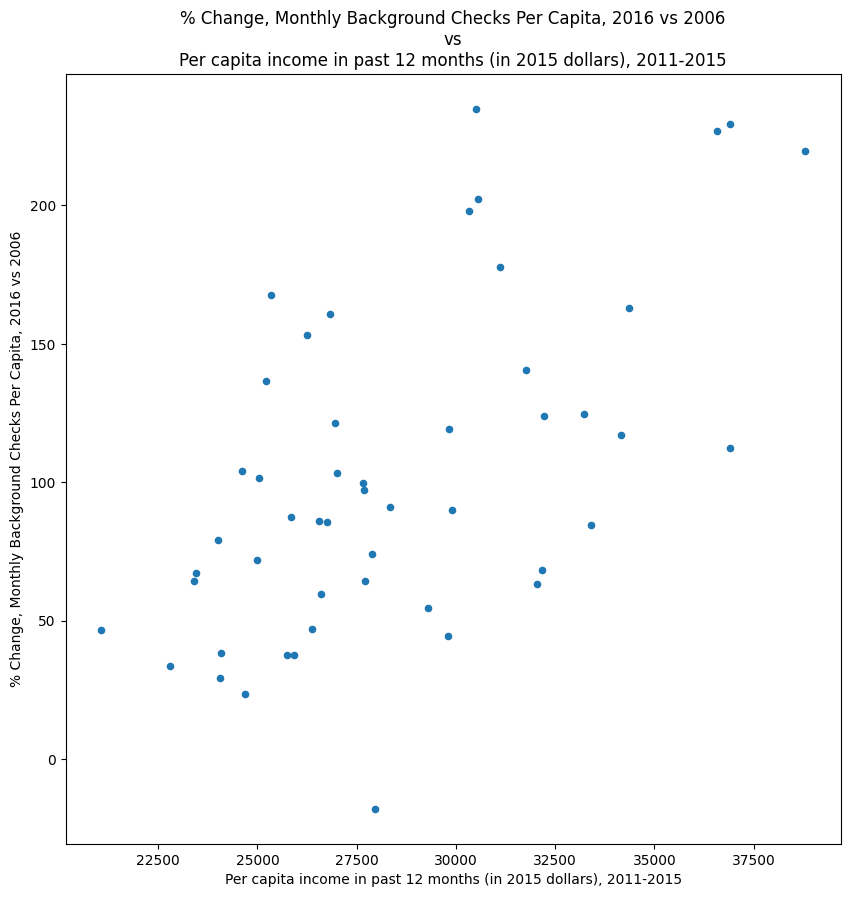

In [73]:
# Generate plots of % Change data vs various Census data

facts = [
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
        'Median value of owner-occupied housing units, 2011-2015',
        'Median gross rent, 2011-2015',
        'Building permits, 2016',
        'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
        "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
        'Persons  without health insurance, under age 65 years, percent',
        'In civilian labor force, total, percent of population age 16 years+, 2011-2015',
        'Median household income (in 2015 dollars), 2011-2015',
        'Per capita income in past 12 months (in 2015 dollars), 2011-2015'
        ]

cx = facts
cy = '% Change, Monthly Background Checks Per Capita, 2016 vs 2006'

for fact in facts:
    dx = df2.query("Fact == @fact")
    dy = df2.query("Fact == @cy")
    data = pd.concat([dx, dy], ignore_index = True)
    data_t = data.T
    plot = data_t.plot.scatter(figsize = (10,10), x = [0], y = [1], title = cy+'\nvs\n'+fact, 
                                xlabel = fact, ylabel = cy)

The scatter plots above suggest the following:

1) There is no relationship between % Population Change and per capita background checks.
2) There is a positive relationship between Median value of owner-occupied housing units and per capita background checks.
3) There is a positive relationship between Median gross rent and per capita background checks.
4) There is a positive relationship between number of Building permits and per capita background checks.
5) There is no relationship between High school graduate or higher rates and per capita background checks.
6) There is a positive relationship between Bachelor's degree or higher rates and per capita background checks.
7) There is no relationship between Persons without health insurance rates and per capita background checks.
8) There is no relationship between In civilian labor force rates and per capita background checks.
9) There is a slight positive relationship between Median household income and per capita background checks.
10) There is a positive relationship between Per capita income in past 12 months and per capita background checks.

<a id='conclusions'></a>
## Conclusions

This analysis supports the following conclusions for each research question:

**Which states have had the largest number of background checks during 2010-2016?**

States with the largest mean monthly number of background checks are often states with large populations. Texas, California, and Florida top the list. 
1) Texas,		88016 +/-30617
2) California,	71363 +/-29640
3) Florida,		66106 +/-20561
4) Pennsylvania,	61471 +/-14950
5) Ohio,		46937 +/-16250
6) Tennessee,	36631 +/-13573
7) Virginia,	35640 +/-11470
8) Missouri,	35159 +/-11779
9) Illinois,	31613 +/-12197
10) Colorado,	31392 +/-8065

By contrast, states with the largest per capita monthly background checks are often states with low population densities such as: Alaska, Montana, Wyoming, North Dakota, and South Dakota. 

A scatter plot of mean monthly background checks versus population indicated a positive relationship between population and the number of background checks, however a scatter plot of per capita monthly background checks and population showed a weak negative relationship. This suggests that the more populus states have a higher total number of background checks, but fewer per capita background checks. This is consistent with the observation that a scatter plot of per capita background checks vs population density shows a negative relationship (i.e., lower population density, higher per capita background checks. 

These observations suggest that population is an important indicator for the total number of firearms within a state, however a state's population density is an important indicator for the number of firearms per captia. Additional calculations and study would be needed to determine the correlation between the number of background checks and actual number of firearms. Note that there are inconsistencies between states in background check reporting practices. This was apparent with how Hawaii and Nebraska reported data. Futhermore, laws and rules might change from time to time and lead to a drift in the data that would need to be accounted for. These factors could increase the variance and uncertainty in results.

**Which states have had the largest increase in background checks since 2010?**

With the exception of Illinois, California, and Florida, the top ten states with the largest increase in the number of background checks are different from those with either a top ten rank for mean monthly background checks or per capita monthly background checks. 

1) Illinois, 234%
2) Massachusetts, 229%
3) New Jersey, 226%
4) Connecticut,	219%
5) Delaware, 202%
6) California, 197%
7) Rhode Island, 177%
8) Indiana, 167%
9) New Hampshire, 163%
10) Florida, 160%

**Are there any potential relationships between a changes in the number of background checks and other changes in the population?**

There appears to be no relationship between increases in the number of background checks and population change, high school graduation rates, health insurance rates, or employment rates. There appears to be a positive relationship between increases in the number of background checks economic factors such as per capita income, median home values, median rents, number of building permits, and rates of college education. Quantitative analysis of these observations could be peformed by regression analysis. Additional data sources might be necessary to determine quantitative correlations and draw stronger conclusions.